In [4]:
"""
Erick Serrano
HW 14

1) Import the visual package in python to 
make an animation on the screen of the 
position of the particle in Brownian motion

2) Rewrite the radioactive decay to generate
1000 random numbers following the 
non-uniformed distribution.

"""
%matplotlib inline
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [19]:
plt.figure(figsize=[18,12])


"""
Calculate all positions on the board

"""
# init
L1 = 101
L2 = 101
N = 10000

position = np.empty([N,2])
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
        
    position[i,:] = position1



<Figure size 1296x864 with 0 Axes>

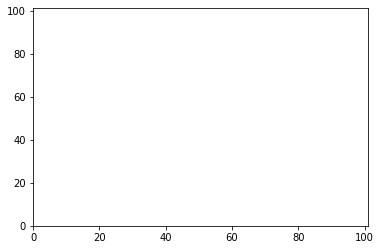

In [17]:
fig, ax = plt.subplots()
line, = plt.plot([],[], 'ro',lw=2)
    
"""
Fill the plot with the data of position
"""
    
def init():
    ax.set_xlim(0, L1)
    ax.set_ylim(0, L2)

    return line,

def animate(i):
    
    line.set_data(position[:i%N,0],position[:i%N,1])
    return line,


anim = animation.FuncAnimation(fig, animate, init_func = init, frames = N, blit = True)

plt.show()
anim.save("movie.mp4")

"""

The animation is save on 'movie.mp4' so please 
check it out there

"""

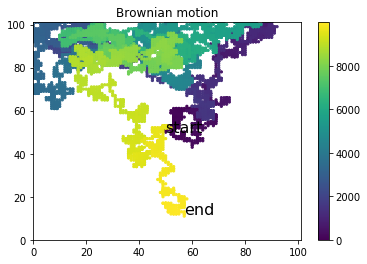

In [18]:
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.scatter(position[:,0], position[:,1], c=range(N), s=5)
plt.text(position[0,0], position[0,1], 'start', fontsize=16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize=16)

plt.colorbar()
plt.show()

Now, we "rewrite the radiactive decay to generate 1000 random numbers following the non-unformed distribution"

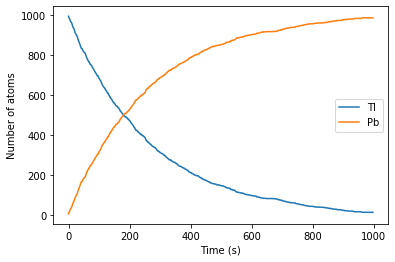

In [20]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()

I was unsure what the question asked for this portion of the homework (it seems that there are 1000 numbers generated already on line 14, $z0$). Thus, I could not/was unsure if I should finish this portion of the homework